In [31]:

# notes from: https://docs.scipy.org/doc/scipy/reference/tutorial/spatial.html

# interpolation = inferring values between two points

import numpy as np
import matplotlib.pyplot as plt
import inspect

[[2 3 0]
 [3 1 0]]
[[2 0]
 [2 3]
 [1 0]
 [3 1]]


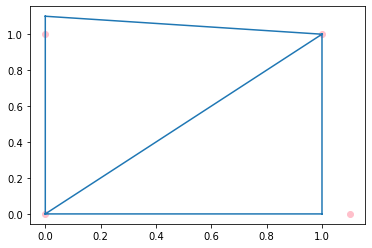

[('__class__', scipy.spatial.qhull.Delaunay),
 ('__del__',
  <bound method _QhullUser.__del__ of <scipy.spatial.qhull.Delaunay object at 0x13cd2fa60>>),
 ('__delattr__',
  <method-wrapper '__delattr__' of Delaunay object at 0x13cd2fa60>),
 ('__dict__',
  {'_qhull': None,
   'paraboloid_scale': 0.5,
   'paraboloid_shift': -0.0,
   'simplices': array([[2, 3, 0],
          [3, 1, 0]], dtype=int32),
   'neighbors': array([[ 1, -1, -1],
          [-1,  0, -1]], dtype=int32),
   'equations': array([[ 0.40824829,  0.40824829, -0.81649658, -0.        ],
          [ 0.36681262,  0.44832653, -0.81513915, -0.        ]]),
   'coplanar': array([], shape=(0, 3), dtype=int32),
   'good': array([1, 1], dtype=int32),
   'nsimplex': 2,
   '_transform': array([[[ 1.        , -1.        ],
           [ 0.        ,  1.        ],
           [ 0.        ,  0.        ]],
   
          [[ 1.        ,  0.        ],
           [-0.90909091,  0.90909091],
           [ 0.        ,  0.        ]]]),
   '_vertex_to_s

In [39]:
from scipy.spatial import Delaunay

points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
tri = Delaunay(points)

print(tri.vertices)
print(tri.convex_hull)

plt.scatter(points[:,1], points[:,0], color = 'pink')
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.show()

inspect.getmembers(tri)  # show all methods and data in tri which can be called


In [40]:
# shows coplanar points = group of 3+ points lying on same plane
tri.coplanar  


array([], shape=(0, 3), dtype=int32)

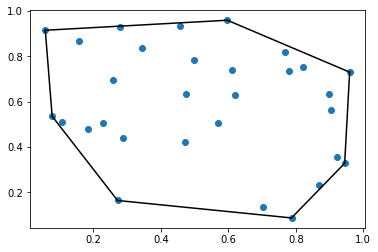

In [45]:
# convex hull = smallest shape possible that encompasses all points while remaining convex
from scipy.spatial import ConvexHull

rng = np.random.default_rng()
points = rng.random((30, 2))
hull = ConvexHull(points)

plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex,0], points[simplex,1], 'k-')

vertices: 
[[-0.22492845  0.14109974]
 [ 0.44459033 -0.44431854]
 [-0.30034598  8.61623829]
 [ 0.34071947  1.95504073]
 [ 0.36824321  0.92060685]]
ridge_vertices
[[-1, 2], [-1, 8], [2, 9], [8, 9], [2, 3]]


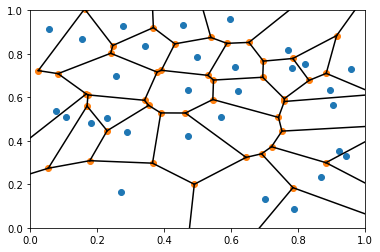

In [76]:
from scipy.spatial import Voronoi
vor = Voronoi(points)

# vertices are the nodes in the voronoi graph
print('vertices: ')
print(vor.vertices[:5, :])
print('ridge_vertices')
print(vor.ridge_vertices[:5])

# showing points on plot
plt.plot(points[:, 0], points[:, 1], 'o')
plt.plot(vor.vertices[:, 0], vor.vertices[:, 1], 'o')

for simplex in vor.ridge_vertices:  #  simplex and vertices appear all identical
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):   # dont show values under 0, which show up as odd lines overlapping 'true' polygons
        plt.plot(vor.vertices[simplex, 0], vor.vertices[simplex, 1], 'k-')
        
        
# a bit zoomed in but you get the idea
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()